In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from aero_design_functions import get_design_functions_1MW, single_point_design
from scipy.optimize import fsolve
from lacbox.io import load_pwr, load_ind, load_inds, load_ae, load_pc
from lacbox.test import test_data_path
from myteampack import MyHTC
from aero_design_functions import*

In [73]:
def thickness(r_norm, chord_root):
    """Absolute thickness [m] as a function of blade span [m] for 35-m blade"""
    p_edge = [
        9.35996e-8,
        -1.2911e-5,
        7.15038e-4,
        -2.03735e-2,
        3.17726e-1,
        -2.65357,
        10.2616,
    ]  # polynomial coefficients
    t_poly = np.polyval(p_edge, r)  # evaluate polynomial
    t = np.minimum(t_poly, chord_root)  # clip at max thickness
    return t

In [74]:
"""Step 2"""

# Given values
#Former class IA
V_rated_X = 11.4  # m/s
I_rated_X = 0.16
R_X = 89.17  # m

#New Class IIIB
I_rated_Y = 0.14

# Define the system of nonlinear equations
def equations(vars):
    V_rated_Y, R_Y = vars
    eq1 = V_rated_Y - (R_X / R_Y)**(2/3) * V_rated_X
    eq2 = R_Y - ((V_rated_X * (1 + 2 * I_rated_X)) / (V_rated_Y * (1 + 2 * I_rated_Y)))**(2/3) * R_X
    return [eq1, eq2]

# Initial guesses for V_rated_Y and R_Y
initial_guess = [1, 1]

# Solve the system of equations
solution = fsolve(equations, initial_guess)

# Extract the solution
V_rated_Y, R_Y = solution

# Output the results
print(f"R_Y: {R_Y} m")
print(f"V_rated_Y: {V_rated_Y} m/s")

R_Y: 92.52423873190988 m
V_rated_Y: 11.12278857452085 m/s


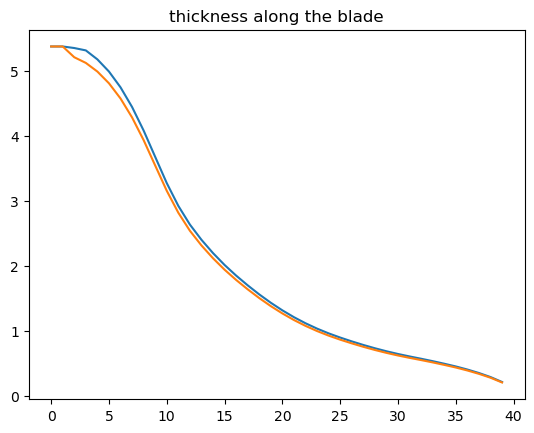

In [75]:
"""Step4"""

Data_ae = load_ae("DTU_10MW_RWT_ae.dat")

# Curve length   Blade chord     Relative thickness

# Data from the DTU 10MW
data_ae = {
    'curve':Data_ae[:,0],
    'chord':Data_ae[:,1],
    'rel_th':Data_ae[:,2]
    }

abs_t=data_ae["chord"]*data_ae["rel_th"]/100*R_Y/R_X # relative thickness
abs_t_dtu = data_ae["chord"]*data_ae["rel_th"]/100 # absolute

# to force the thickness at the root and make it smoother
abs_t[0:2]=data_ae["chord"][0:2]
abs_t[2]=0.99*abs_t[2]

#plot the former blade shape and the new one
plt.plot(abs_t)
plt.plot(abs_t_dtu)
plt.title("thickness along the blade")
plt.show()

In [76]:
#Values to make a new htc file

# index, x-coordinate, y-coordinate, z-coordinate, theta
# theta - Angle between local x-axis and main_body x-axis in the main_body x-y coordinate plane. For a straight blade this angle is the aerodynamic twist.

htc = [[1, 0.00000E+00, 7.00600E-05, 4.44089E-16, -1.45000E+01],
[2, -2.06477E-05, -1.22119E-02, 3.00000E+00, -1.45000E+01], 
[3, -7.28810E-03, -2.49251E-02, 6.00000E+00, -1.44851E+01],
[4, -1.89235E-02, -2.73351E-02, 7.00004E+00, -1.44610E+01], 
[5,-5.41282E-02,-2.82163E-02,8.70051E+00,-1.43388E+01], 
[6, -1.26633E-01, -2.13210E-02, 1.04020E+01, -1.40201E+01], 
[7, -2.25666E-01, -1.28378E-02, 1.22046E+01, -1.33904E+01], 
[8, -2.88563E-01, -7.70659E-03, 1.32065E+01, -1.29371E+01], 
[9, -3.99194E-01, -4.88317E-03, 1.50100E+01, -1.19445E+01], 
[10, -5.76634E-01, -1.80296E-02, 1.82151E+01, -9.98243E+00], 
[11, -7.07136E-01, -5.01772E-02, 2.14178E+01, -8.45147E+00], 
[12, -7.91081E-01, -9.41228E-02, 2.46189E+01, -7.46417E+00], 
[13, -8.37195E-01, -1.48880E-01, 2.78193E+01, -6.72916E+00], 
[14, -8.53948E-01, -2.14514E-01, 3.10194E+01, -6.08842E+00], 
[15, -8.49367E-01, -2.90618E-01, 3.42197E+01, -5.49322E+00], 
[16, -7.93920E-01, -4.62574E-01, 4.02204E+01, -4.39222E+00], 
[17, -7.16284E-01, -6.88437E-01, 4.66217E+01, -3.09315E+00], 
[18, -6.34358E-01, -9.60017E-01, 5.30232E+01, -1.75629E+00], 
[19, -5.53179E-01, -1.28424E+00, 5.94245E+01, -5.00650E-01], 
[20, -4.75422E-01, -1.66402E+00, 6.58255E+01, 6.01964E-01], 
[21, -4.03180E-01, -2.10743E+00, 7.22261E+01, 1.55560E+00], 
[22, -3.30085E-01, -2.65630E+00, 7.90266E+01, 2.51935E+00], 
[23, -3.10140E-01, -2.78882E+00, 8.05267E+01, 2.72950E+00], 
[24, -2.86719E-01, -2.92517E+00, 8.20271E+01, 2.93201E+00], 
[25, -2.55823E-01, -3.06577E+00, 8.35274E+01, 3.11874E+00], 
[26, -2.07891E-01, -3.20952E+00, 8.50277E+01, 3.28847E+00], 
[27, -8.98940E-02, -3.33685E+00, 8.63655E+01, 3.42796E+00]]

new_center_line_htc = np.array(htc)


new_center_line_htc[:,3]=new_center_line_htc[:,3]*R_Y/R_X

print(new_center_line_htc[0])

[ 1.00000000e+00  0.00000000e+00  7.00600000e-05  4.60793951e-16
 -1.45000000e+01]


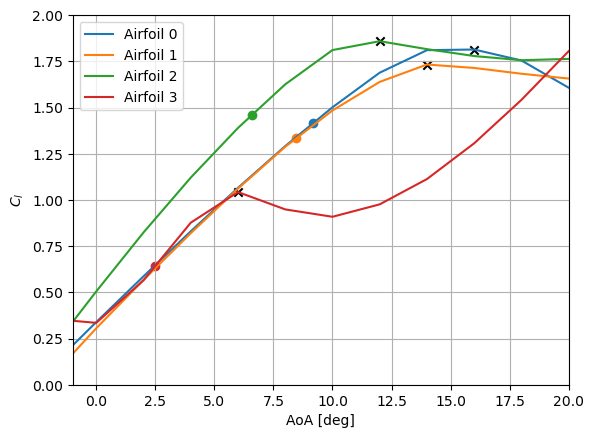

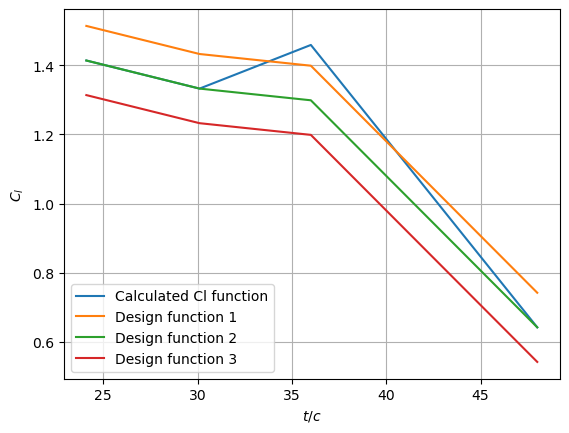

In [77]:
"""Step 6"""
"""I started working here
My goal was to use the data that we have from the 10MW pc.dat file for the cl and cd and alpha to determine for each type of blade what what the cl, cd and aoa at the maximum cl/cd
Then generate a function get_design_functions_10MW() that will take into consideration those values in order to get the cl cd and aoa designed 
and then plot everything using the previous method view in the exercice of week 3
BUT THE PLOTS ARE A BIT WEIRD please have a look"""


# Define a cl plot for the 10MW using the pc.dat
Data_cl = load_pc("DTU_10MW_RWT_pc.dat") # return a list per blade
n = len(Data_cl)-2 # exclude airfoils of 100% and 60% relative thickness
des_param = np.zeros((4,n)) # relative thickness, cl design, cd design, AoA design
arg_0 = [63,63,63,58] # indexies of the AoAs before stall

for k in range(n):
    cl_max = np.amax(Data_cl[k]["cl"][50:arg_0[k]]) # maximum lift coefficient within the range
    cl_des=cl_max-0.4

    # finding corresponding AoA
    arg_max = np.where(Data_cl[k]["cl"] == cl_max)
    aoa_max = Data_cl[k]["aoa_deg"][arg_max]
    
    # interpolating to find AoA and Cd of Cl design
    aoa_des = np.interp(cl_des,Data_cl[k]["cl"][50:arg_0[k]],Data_cl[k]["aoa_deg"][50:arg_0[k]])
    cd_des = np.interp(cl_des,Data_cl[k]["cl"][50:arg_0[k]],Data_cl[k]["cd"][50:arg_0[k]])
    des_param[:,k] = [Data_cl[k]["tc"],cl_des,cd_des,aoa_des]

    line, = plt.plot(Data_cl[k]["aoa_deg"],Data_cl[k]["cl"],label=f"Airfoil {k}")
    plt.scatter(aoa_des,cl_des,marker="o", color = line.get_color())
    plt.scatter(aoa_max,cl_max,marker="x", color = 'k')

plt.xlim(-1,20)
plt.ylim(0,2)
plt.xlabel('AoA [deg]')
plt.ylabel('$C_l$')
plt.legend()
plt.grid()
plt.show()

plt.plot(des_param[0,:],des_param[1,:], label="Calculated Cl function")

for i in range(1,4):
    _, _, _, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(i)
    plt.plot(tc_vals, cl_vals, label=f"Design function {i}")
    plt.xlabel('${t/c}$')
    plt.ylabel('$C_l$')

plt.legend()
plt.grid()
plt.show()

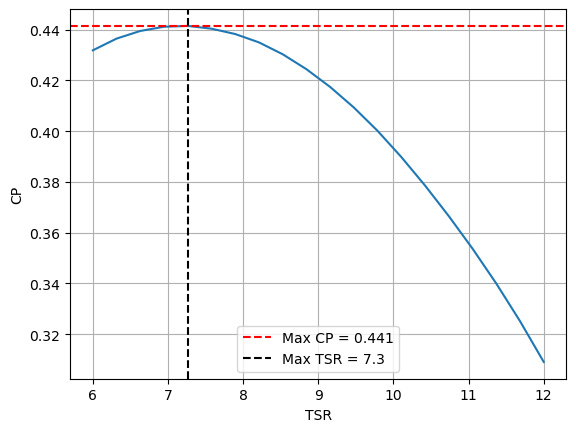

In [78]:
"""Step 7"""

# %% Inputs
R = R_Y  # Rotor radius [m]
r_hub = 2.8  # Hub radius [m]
r = np.linspace(r_hub, R - 0.1, 40)  # Rotor span [m]
chord_root = 5.38  # Chord size at the root [m]
chord_max = 6.3  # Maximum chord size [m]
#chord_max = np.amax(abs_t)/(np.amax(des_param[0,:])/100) # Maximum chord size [m] 
"""BE CAREFUL HOW TO CHOOSE CHORD MAX"""
t = abs_t # Absolute thickness [m]
B = 3  # Number of blades [#]
# Aero dynamic polar design functions and the values (t/c vs. cl, cd, aoa)
cl_scale = 1.0  # Change this value to scale the cl-values
cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions(2)

TSR = np.linspace(6,12,20)
chord_max_list = [6.3]

for chord_max in chord_max_list:
    CP_list =[]

    for tsr in TSR:
        # %% Solving for the a single design
        chord, tc, twist, cl, cd, aoa, a, CLT, CLP, CT, CP = single_point_design(
            r, t, tsr, R, cl_des, cd_des, aoa_des, chord_root, chord_max, B)
        CP_list.append(CP)

    plt.plot(TSR,CP_list)

CP_max=np.amax(CP_list)
TSR_max=TSR[np.argmax(CP_list)]

plt.axhline(CP_max, label = f'Max CP = {CP_max:.3f}',linestyle='--', color='red')
plt.axvline(TSR_max, label = f'Max TSR = {TSR_max:.1f}',linestyle='--', color='k')
plt.xlabel("TSR")
plt.ylabel('CP')
plt.legend()
plt.grid()
plt.show()


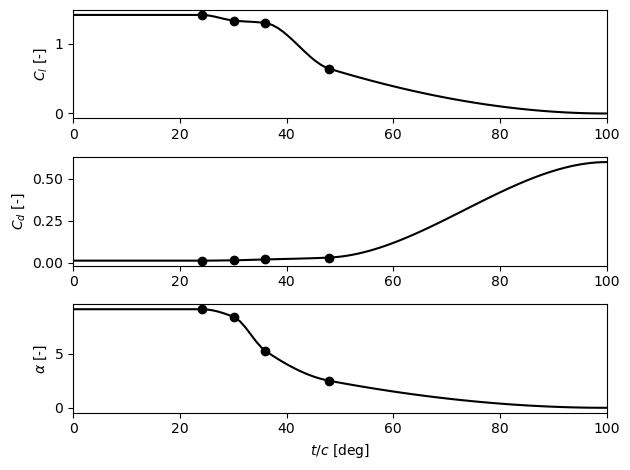

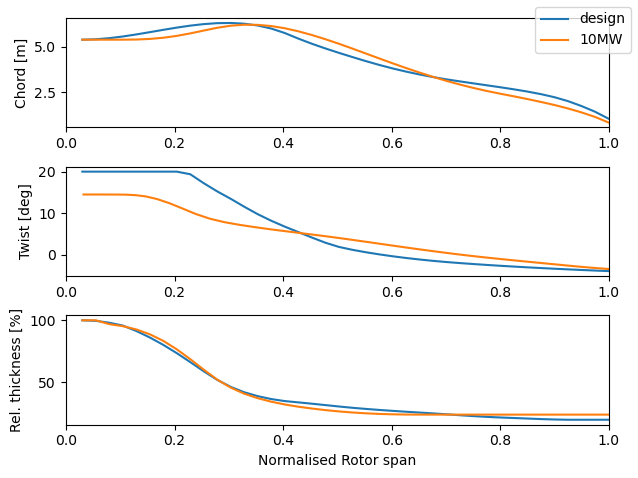

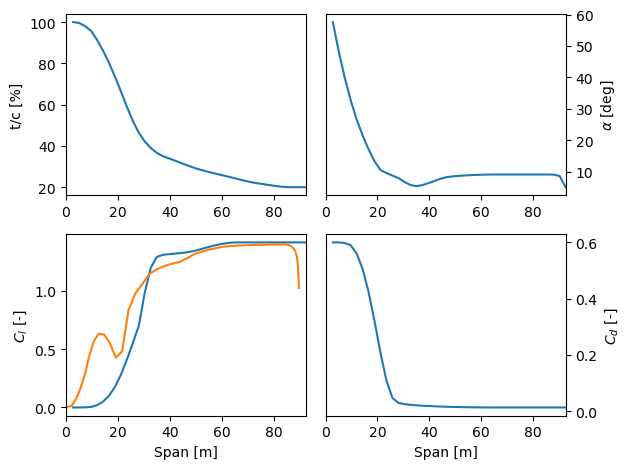

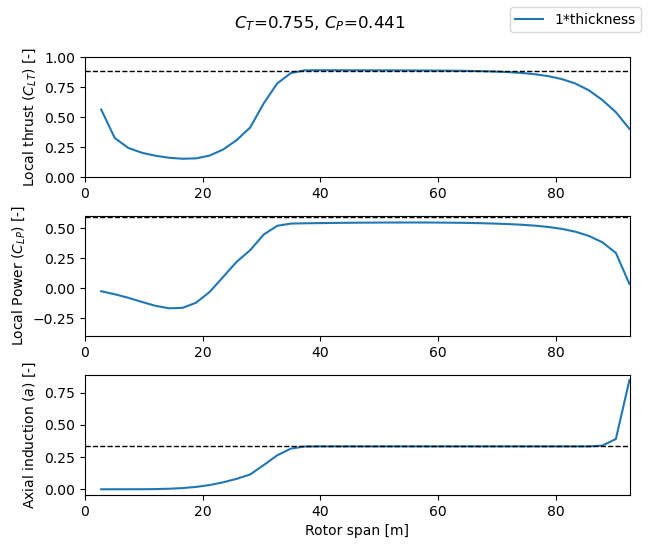

In [80]:
tsr = TSR_max  # Tip-Speed-Ratio [-]

# %% Solving for the a single design
chord, tc, twist, cl, cd, aoa, a, CLT, CLP, CT, CP = single_point_design(
    r, t, tsr, R, cl_des, cd_des, aoa_des, chord_root, chord_max, B
)

"""Data 10MW"""

twist_10MW = np.array([ 0.253095  ,  0.253104  ,  0.253113  ,  0.253115  ,  0.253106  ,
        0.253088  ,  0.253019  ,  0.252883  ,  0.25241   ,  0.250469  ,
        0.245123  ,  0.23393   ,  0.216861  ,  0.195114  ,  0.171519  ,
        0.151683  ,  0.136897  ,  0.125664  ,  0.115773  ,  0.1066    ,
        0.0978849 ,  0.0891832 ,  0.0804282 ,  0.0711842 ,  0.0613002 ,
        0.0512906 ,  0.0412496 ,  0.031342  ,  0.0218855 ,  0.0129861 ,
        0.00460966, -0.00305632, -0.00991266, -0.0161097 , -0.0218838 ,
       -0.0271989 , -0.0321248 , -0.0367266 , -0.0409807 , -0.0448672 ,
       -0.0483542 , -0.0513391 , -0.0537827 , -0.0557309 , -0.0572525 ,
       -0.0583948 , -0.0591894 , -0.0596566 ])*180/np.pi

r_10MW = (np.array([ 0.08883 ,  0.354955,  0.797281,  1.41399 ,  2.20255 ,  3.15971 ,
        4.28156 ,  5.56347 ,  7.00025 ,  8.58585 , 10.3137  , 12.177   ,
       14.1679  , 16.2782  , 18.4993  , 20.822   , 23.2369  , 25.7339  ,
       28.3028  , 30.9331  , 33.6139  , 36.3343  , 39.083   , 41.8488  ,
       44.6202  , 47.386   , 50.1347  , 52.8551  , 55.5359  , 58.1662  ,
       60.7352  , 63.2321  , 65.647   , 67.9697  , 70.1908  , 72.3012  ,
       74.2921  , 76.1554  , 77.8833  , 79.4689  , 80.9056  , 82.1875  ,
       83.3093  , 84.2666  , 85.0551  , 85.6716  , 86.1141 , 86.3804])+r_hub)/R_X

tc_plot = np.linspace(0, 100, 100)
fig1, axs1 = plt.subplots(3, 1, num=1)

axs1[0].plot(tc_plot, cl_des(tc_plot), "k")
axs1[0].plot(tc_vals, cl_vals, "ok")
axs1[0].set_ylabel("$C_l$ [-]")
axs1[0].set_xlim(0, 100)

axs1[1].plot(tc_plot, cd_des(tc_plot), "k")
axs1[1].plot(tc_vals, cd_vals, "ok")
axs1[1].set_ylabel("$C_d$ [-]")
axs1[1].set_xlim(0, 100)

axs1[2].plot(tc_plot, aoa_des(tc_plot), "k")
axs1[2].plot(tc_vals, aoa_vals, "ok")
axs1[2].set_ylabel(r"$\alpha$ [-]")
axs1[2].set_xlabel(r"$t/c$ [deg]")
axs1[2].set_xlim(0, 100)

fig1.tight_layout()

# %% Plot the chord, twist and relative-thickness
fig2, axs2 = plt.subplots(3, 1, num=2, clear=True)

r_norm=r/R_Y
# Chord
axs2[0].plot(r_norm, chord,label="design")
axs2[0].plot(r_norm, data_ae["chord"],label="10MW")
axs2[0].set_ylabel("Chord [m]")
axs2[0].set_xlim(0, R/R_Y)

# Twist
axs2[1].plot(r_norm, twist)
axs2[1].plot(r_10MW, twist_10MW)
axs2[1].set_ylabel("Twist [deg]")
axs2[1].set_xlim(0, R/R_Y)

# t/c
axs2[2].plot(r_norm, tc)
axs2[2].plot(r_norm, data_ae["rel_th"])
axs2[2].set_ylabel("Rel. thickness [%]")
axs2[2].set_xlabel("Normalised Rotor span")
axs2[2].set_xlim(0, R/R_Y)

fig2.legend()
fig2.tight_layout()

# %% Plot r vs. t/c, aoa, cl, cd
fig3, axs3 = plt.subplots(2, 2, num=3, clear=True)

# t/c
axs3[0, 0].plot(r, tc)
axs3[0, 0].set_ylabel("t/c [%]")
axs3[0, 0].set_xlim(0, R)

# aoa
axs3[0, 1].plot(r, aoa)
axs3[0, 1].set_ylabel(r"$\alpha$ [deg]")
axs3[0, 1].set_xlim(0, R)
axs3[0, 1].yaxis.tick_right()
axs3[0, 1].yaxis.set_label_position("right")

# cl
axs3[1, 0].plot(r, cl)
axs3[1, 0].plot(r_redesign, Cl_redesign)
axs3[1, 0].set_ylabel("$C_l$ [-]")
axs3[1, 0].set_xlabel("Span [m]")
axs3[1, 0].set_xlim(0, R)

# cd
axs3[1, 1].plot(r, cd)
axs3[1, 1].set_ylabel("$C_d$ [-]")
axs3[1, 1].set_xlabel("Span [m]")
axs3[1, 1].set_xlim(0, R)
axs3[1, 1].yaxis.tick_right()
axs3[1, 1].yaxis.set_label_position("right")

fig3.tight_layout()

# %% Plot r vs. CLT, CLP, a
fig4, axs4 = plt.subplots(3, 1, num=4, clear=True, figsize=(6.5, 5.5))

# Local-Thrust-Coefficient
axs4[0].plot(r, CLT, label="1*thickness")
axs4[0].axhline(y=8 / 9, ls="--", color="k", lw=1)
axs4[0].set_ylabel("Local thrust ($C_{LT}$) [-]")
axs4[0].set_ylim(0, 1.0)
axs4[0].set_xlim(0, R)


# Local-Power-Coefficient
axs4[1].plot(r, CLP)
axs4[1].axhline(y=16 / 27, ls="--", color="k", lw=1)
axs4[1].set_ylabel("Local Power ($C_{LP}$) [-]")
axs4[1].set_xlim(0, R)
axs4[1].set_ylim(-0.4, 0.6)

# Axial Induction
axs4[2].plot(r, a)
axs4[2].axhline(y=1 / 3, ls="--", color="k", lw=1)
axs4[2].set_ylabel("Axial induction ($a$) [-]")
axs4[2].set_xlabel("Rotor span [m]")
axs4[2].set_xlim(0, R)

fig4.legend()
fig4.suptitle(f"$C_T$={CT:1.3f}, $C_P$={CP:1.3f}")#, $C_T_Rel_Thi$={CT1:1.3f}, $C_P_Rel_Thi$={CP1:1.3f}")
fig4.tight_layout()

plt.show()

In [109]:
omega_Y = (TSR_max * V_rated_Y / R_Y) * 60 / (2 * np.pi)
print(omega_Y)

8.337868262998398


In [105]:
ind_data = load_ind('Group1_redesign_hawc2s_1wsp_u11123.ind')
ind_data_DTU_10 = load_ind('dtu_10mw_hawc2s_1wsp_u8000.ind')
# Print the names in the dict
print(ind_data.keys())

alpha_redesign = np.rad2deg(ind_data['aoa_rad'])
Cl_redesign = ind_data['Cl']
Cd_redesign = ind_data['Cd']
CP_redesign = ind_data['CP']
CT_redesign = ind_data['CT']
r_redesign = ind_data["s_m"]

alpha_DTU_10 = np.rad2deg(ind_data['aoa_rad'])
Cl_DTU_10 = ind_data_DTU_10['Cl']
Cd_DTU_10 = ind_data_DTU_10['Cd']
CP_DTU_10 = ind_data_DTU_10['CP']
CT_DTU_10 = ind_data_DTU_10['CT']
r_DTU_10 = ind_data_DTU_10["s_m"]

dict_keys(['s_m', 'a', 'ap', 'flow_angle_rad', 'aoa_rad', 'flow_speed_ms', 'Fx_Nm', 'Fy_Nm', 'M_Nmm', 'UX0_m', 'UY0_m', 'UZ0_m', 'twist_rad', 'X_AC0_m', 'Y_AC0_m', 'Z_AC0_m', 'Cl', 'Cd', 'Cm', 'CLp0_rad', 'CDp0_rad', 'CMp0_rad', 'F0', 'F_rad', 'CL_FS0', 'CLFS_rad', 'V_a_ms', 'V_t_ms', 'torsion_rad', 'vx_ms', 'vy_ms', 'chord_m', 'CT', 'CP', 'angle_rad', 'v_1', 'v_2', 'v_3'])


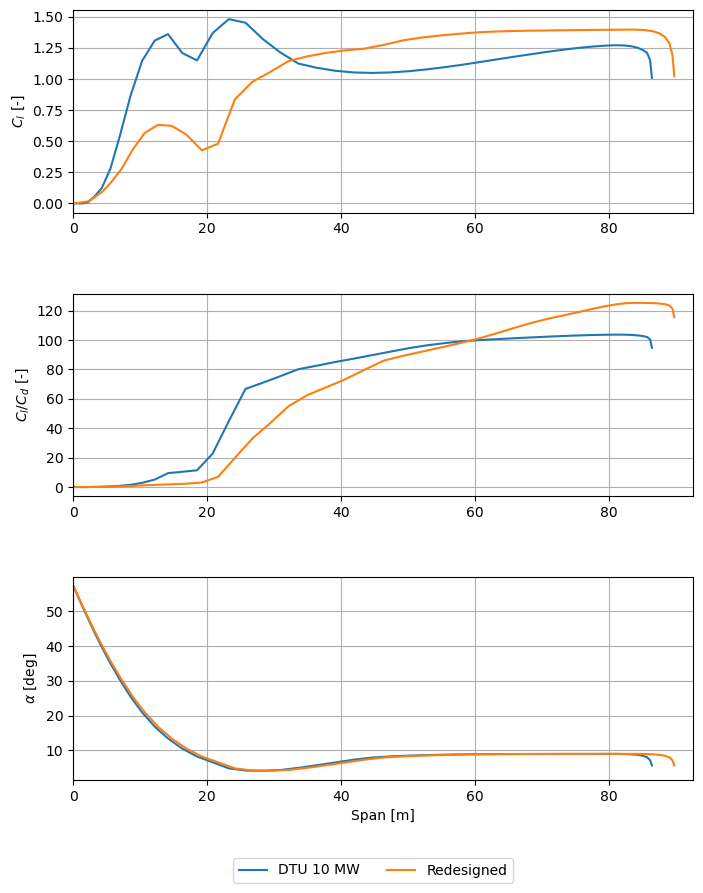

In [103]:
# Create subplots with increased vertical spacing
fig5, axs5 = plt.subplots(3, 1, num=3, clear=True, figsize=(8, 10))  # Adjust figure size for better spacing
fig5.subplots_adjust(hspace=0.4)  # Increase the space between the plots

# Plot Cl
axs5[0].plot(r_DTU_10, Cl_DTU_10, label='DTU 10 MW')
axs5[0].plot(r_redesign, Cl_redesign, label='Redesigned')
axs5[0].set_ylabel("$C_l$ [-]")
axs5[0].set_xlim(0, R)
axs5[0].grid(True)  # Add grid

# Plot Cl / Cd
axs5[1].plot(r_DTU_10, (Cl_DTU_10 / Cd_DTU_10))
axs5[1].plot(r_redesign, (Cl_redesign / Cd_redesign))
axs5[1].set_ylabel("$C_l / C_d$ [-]")
axs5[1].set_xlim(0, R)
axs5[1].grid(True)  # Add grid

# Plot AoA with label
axs5[2].plot(r_DTU_10, alpha_DTU_10)
axs5[2].plot(r_redesign, alpha_redesign)
axs5[2].set_ylabel(r"$\alpha$ [deg]")
axs5[2].set_xlabel("Span [m]")  # Add label for the last plot
axs5[2].set_xlim(0, R)
axs5[2].grid(True)  # Add grid

# Move the legend to the bottom of the figure and apply it to all plots
fig5.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0))

# Show the plot
plt.show()

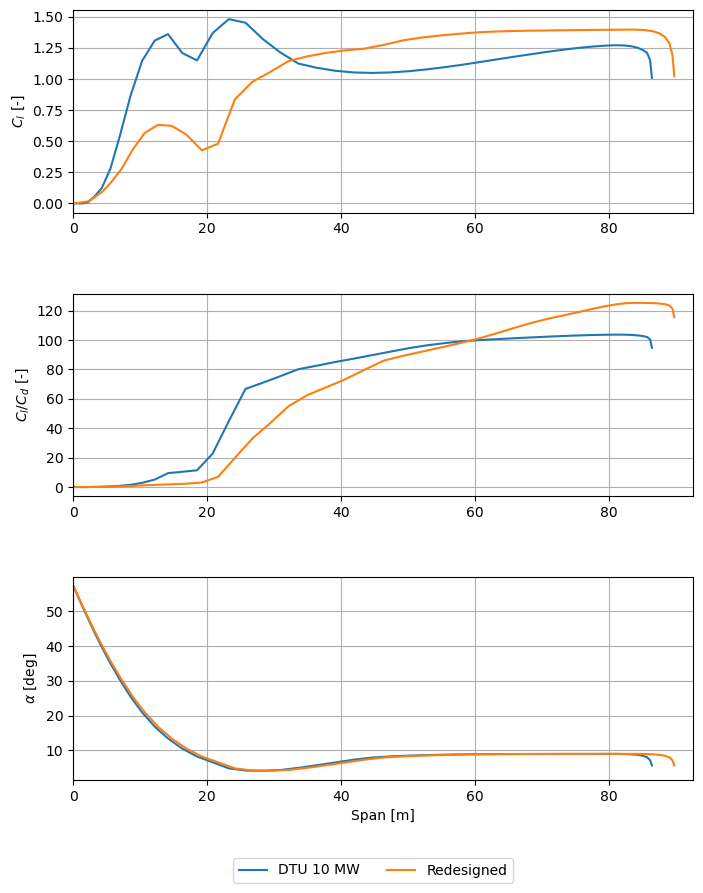

In [104]:
# Create subplots with increased vertical spacing
fig6, axs6 = plt.subplots(3, 1, num=3, clear=True, figsize=(8, 10))  # Adjust figure size for better spacing
fig6.subplots_adjust(hspace=0.4)  # Increase the space between the plots

# Plot Cl
axs6[0].plot(r_DTU_10, Cl_DTU_10, label='DTU 10 MW')
axs6[0].plot(r_redesign, Cl_redesign, label='Redesigned')
axs6[0].set_ylabel("$C_l$ [-]")
axs6[0].set_xlim(0, R)
axs6[0].grid(True)  # Add grid

# Plot Cl / Cd
axs6[1].plot(r_DTU_10, (Cl_DTU_10 / Cd_DTU_10))
axs6[1].plot(r_redesign, (Cl_redesign / Cd_redesign))
axs6[1].set_ylabel("$C_l / C_d$ [-]")
axs6[1].set_xlim(0, R)
axs6[1].grid(True)  # Add grid

# Plot AoA with label
axs6[2].plot(r_DTU_10, alpha_DTU_10)
axs6[2].plot(r_redesign, alpha_redesign)
axs6[2].set_ylabel(r"$\alpha$ [deg]")
axs6[2].set_xlabel("Span [m]")  # Add label for the last plot
axs6[2].set_xlim(0, R)
axs6[2].grid(True)  # Add grid

# Move the legend to the bottom of the figure and apply it to all plots
fig6.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0))

# Show the plot
plt.show()

In [108]:
len(Cl_DTU_10)


48